In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data
df = pd.read_csv("/content/drive/My Drive/amazone fine food reviews/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#Viewing the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Dimensions of dataset
print(df.shape)

(568454, 10)


In [ ]:
#downsampling the dataset down to 500 rows
df = df.head(5000)
print(df.shape)
df.head()

(500, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


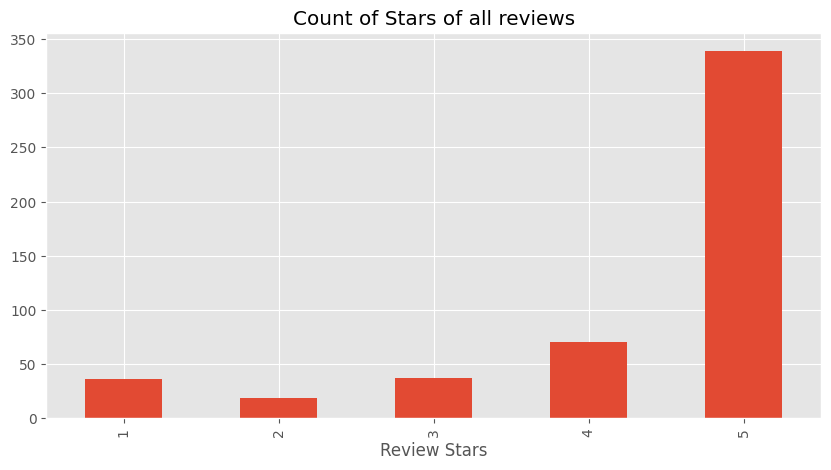

In [ ]:
#Reviewing all the scores in the dataset using a bar plot
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title = 'Count of Stars of all reviews', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
#basic nltk

example = df['Text'][50]                         #We are taking a sample text from the dataset. For this example we can see this is a negative review.
print(example)
nltk.word_tokenize(example)                      #Tokenzing helps in converting the text into a more computer friendly format

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)                             #this is known as part of speech tagging. This gives us part of speech as codes wrt to each text. For example, oatmeal is tagged NN which means it is a singular noun. The abbreviations are available in google.
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)                      #chunk the given data into groups of text
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER Sentiment Scoring
VADER refers to Valence Aware Dictionary and sEntiment Reasoner. It takes all the words in our sentences and categorizes them as positive, negative and neutral. It then adds up all the words to display how positive or negative or neutral a particular sentence is.
However, it doesnt account for relationships between words.


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm                #this is a progress bar tracker for looping through entire datasets

In [ ]:
sia = SentimentIntensityAnalyzer()         #making object of the SentimentIntensityAnalyzer class

In [ ]:
#some example run statement
print(sia.polarity_scores('I am happy'))
print(sia.polarity_scores('I am sad'))
print(sia.polarity_scores('I am fine'))

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}


In [ ]:
sia.polarity_scores(example)       #our original statement

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#running the polarity scores on the entire dataset
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')
vaders.head()                                               #sentiment scores and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


We are now going to make some assumptions on our data. For example, a 5 star review will be more likely of positive nature than a 1 star review

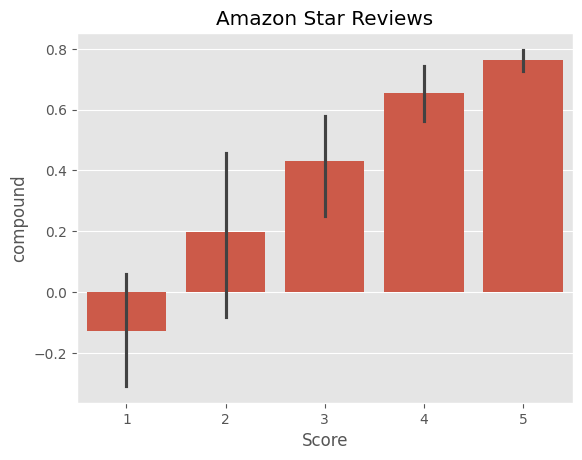

In [ ]:
#plot vader results
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title("Amazon Star Reviews")
plt.show()

If we look at the compound graph, we see that 5 star reviews have a more positive classification than 1 star reviews.

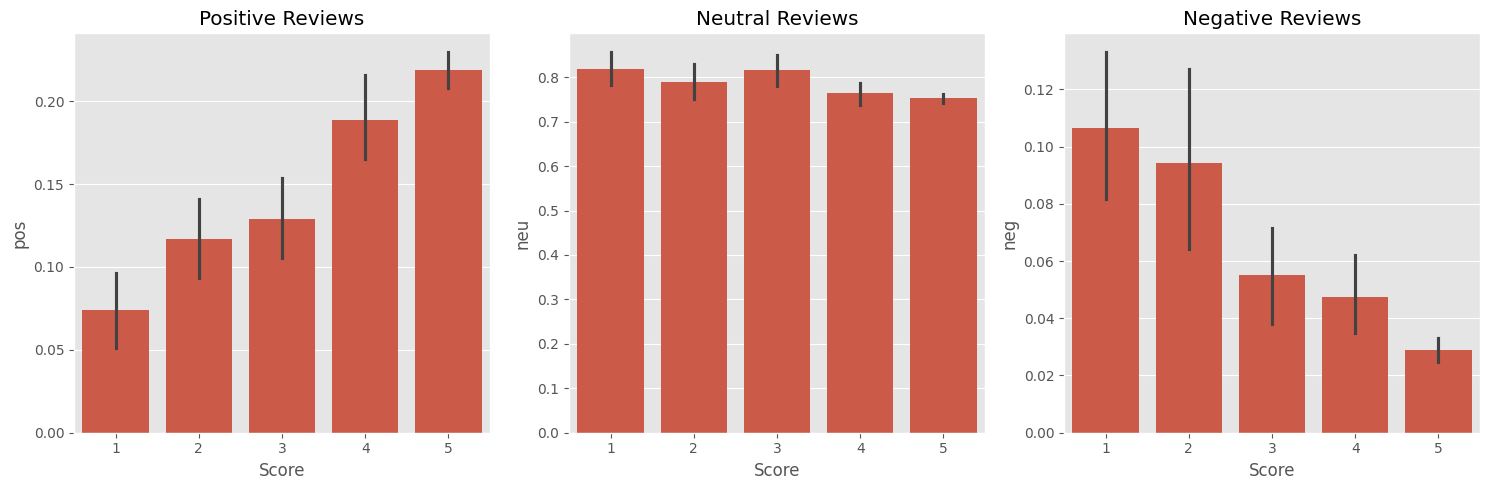

In [ ]:
fig,axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')
plt.tight_layout()
plt.show()

# Roberta Model
VADER analysis produces a result that is not based on the type of relationships between words. Often sometimes people can be sarcastic about something which can change the entire context of the review. Hugging face has produced this Roberta Model which catchs up on the inconsistencies in reviews like sarcasm, etc.

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [ ]:
#pre trained model provided by hugging face
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#Roberta model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687465,
 'roberta_pos': 0.0029573692}

the vader model gave the following output {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}
comparing it with the roberta model we can see how much better the roberta model is


In [ ]:
#running the roberta model on the entire dataset
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt', max_length=512, truncation=True)
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    vader_results = sia.polarity_scores(text)
    vader_results_name = {}
    for key,value in vader_results.items():
      vader_results_name[f'vader_{key}'] = value
    roberta_results = polarity_scores_roberta(text)
    both = {**vader_results_name, **roberta_results}
    res[myid] = both


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327226,
 'roberta_pos': 0.986233}

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Comparing scores between the models

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

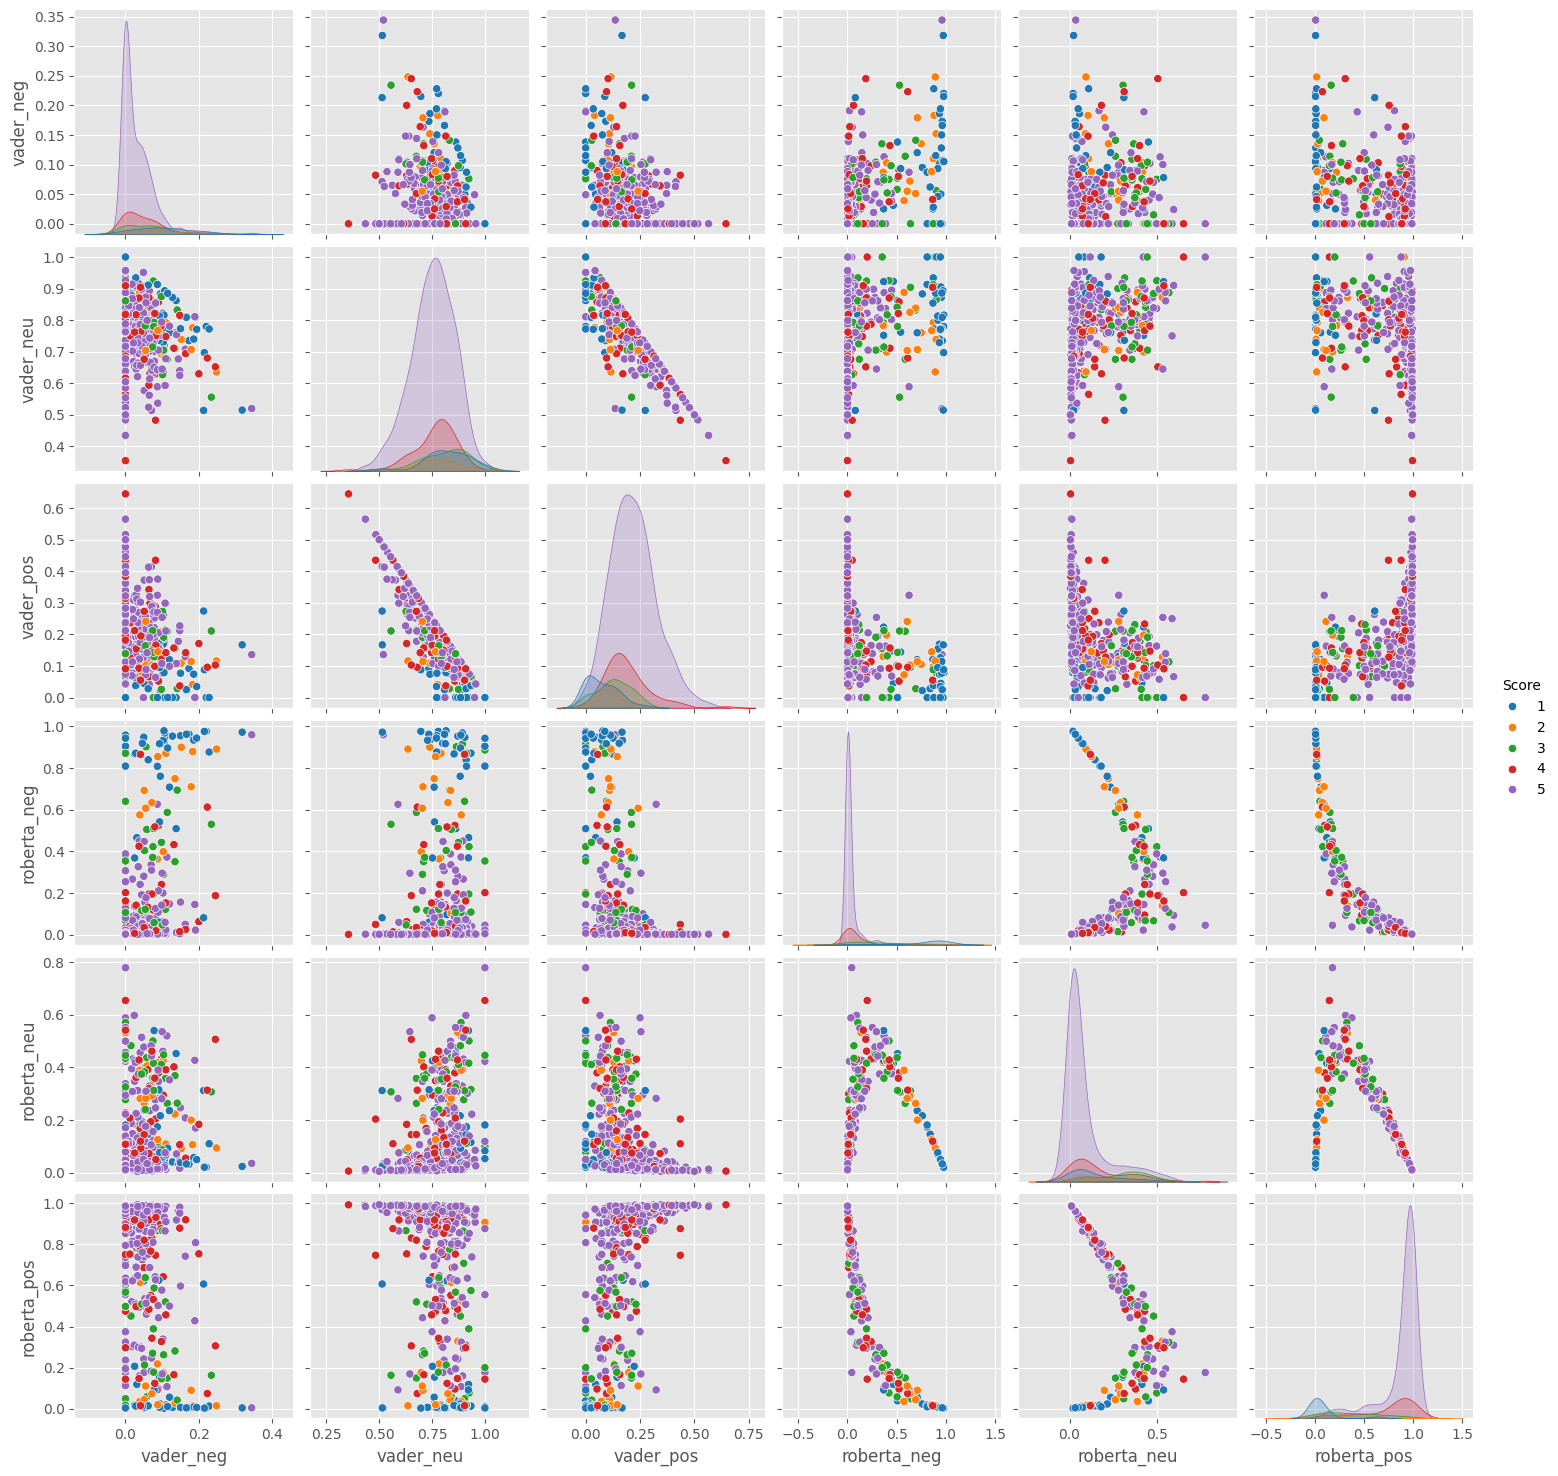

In [ ]:
sns.pairplot(data=results_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette = 'tab10')
plt.show()

#Review Examples
Looking for samples where the model doesn't do what it was supposed to do.
For this we are going to classify positive 1 star reviews and negative 5 star reviews

In [ ]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]       #This is said to be positive by the model but this rating has 1 star which is a negative review.

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]        #Same for the vader analysis

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[1]             #This is said to be negative by the roberta model but the rating has 5 stars which is a positive review

'i know i cannot make tea this good.  granted, i am not from the south but i know i have never enjoyed tea that was this sweet without being too sweet.  it tastes crisp.'

In [ ]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[1]        #Same for the vader analysis

'What a deal this is the healthiest salt you can use.  This box should last our family the year no problem.  Iodized sea salt will not raise your blood pressure as regular salt will.'

values[0] was giving the same result for both the models. However, we can see that the next statement was classified in a very different way.

#Hugging face transformers pipeline
this is a default sentiment analysis pipeline by hugging face

In [ ]:
from transformers import pipeline

In [ ]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
#Example run statements
print(sent_pipeline('This is so good'))
print(sent_pipeline('This is so bad'))
print(sent_pipeline('I am feeling fine, stop bothering me for now'))    #how's this positive?
print(sent_pipeline('The shower sure did work. But the room is haunted'))
print(sent_pipeline("Today's weather is neither particularly sunny nor gloomy, just comfortably mild."))   #this is supposed to be a neutral statement but somehow its classifying it in negative??
print(sent_pipeline('I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'))

[{'label': 'POSITIVE', 'score': 0.9998397827148438}]
[{'label': 'NEGATIVE', 'score': 0.9997832179069519}]
[{'label': 'POSITIVE', 'score': 0.9952371120452881}]
[{'label': 'NEGATIVE', 'score': 0.993239164352417}]
[{'label': 'NEGATIVE', 'score': 0.9842460751533508}]
[{'label': 'NEGATIVE', 'score': 0.9976904392242432}]


In [ ]:
#running the pipeline on the entire dataset
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        res[myid] = sent_pipeline(text)
    except RuntimeError:
      print('Error at tag',myid)

  0%|          | 0/500 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors


Error at tag 83
Error at tag 187


In [ ]:
pipe_res = pd.DataFrame(res).T
pipe_res

,0
1,"{'label': 'POSITIVE', 'score': 0.9983851909637..."
2,"{'label': 'NEGATIVE', 'score': 0.9995254278182..."
3,"{'label': 'POSITIVE', 'score': 0.9997652173042..."
4,"{'label': 'POSITIVE', 'score': 0.9991534948348..."
5,"{'label': 'POSITIVE', 'score': 0.9987082481384..."
...,...
496,"{'label': 'POSITIVE', 'score': 0.999860405921936}"
497,"{'label': 'POSITIVE', 'score': 0.9997543692588..."
498,"{'label': 'POSITIVE', 'score': 0.999424934387207}"
499,"{'label': 'POSITIVE', 'score': 0.9929520487785..."


#Evaluating the model

In [ ]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [ ]:
#for roberta model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


true_labels = results_df['Score']

roberta_predicted_labels = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']]


roberta_predicted_labels = roberta_predicted_labels.idxmax(axis=1)


roberta_predicted_labels = roberta_predicted_labels.map({'roberta_neg': 0, 'roberta_neu': 1, 'roberta_pos': 2})


roberta_accuracy = accuracy_score(true_labels, roberta_predicted_labels )
roberta_precision = precision_score(true_labels, roberta_predicted_labels , average='weighted')
roberta_recall = recall_score(true_labels, roberta_predicted_labels , average='weighted')
roberta_f1 = f1_score(true_labels, roberta_predicted_labels , average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.072
Precision: 0.005225806451612904
Recall: 0.072
F1-score: 0.00974436090225564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#for vader model
true_labels = results_df['Score']

vader_predicted_labels = results_df[['vader_neg', 'vader_neu', 'vader_pos']]


vader_predicted_labels = vader_predicted_labels.idxmax(axis=1)

vader_predicted_labels = vader_predicted_labels.map({'vader_neg': 0, 'vader_neu': 1, 'vader_pos': 2})


vader_accuracy = accuracy_score(true_labels, vader_predicted_labels)
vader_precision = precision_score(true_labels, vader_predicted_labels, average='weighted')
vader_recall = recall_score(true_labels,vader_predicted_labels, average='weighted')
vader_f1 = f1_score(true_labels, vader_predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.072
Precision: 0.005225806451612904
Recall: 0.072
F1-score: 0.00974436090225564


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


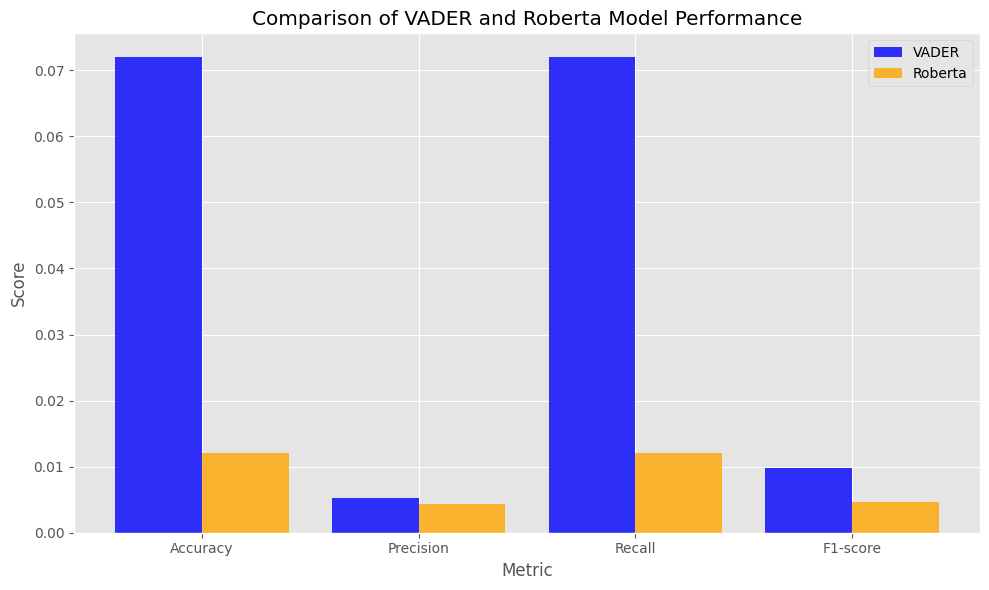

In [ ]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
vader_metrics = [vader_accuracy, vader_precision, vader_recall, vader_f1]
roberta_metrics = [roberta_accuracy, roberta_precision, roberta_recall, roberta_f1]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.4

plt.bar(x - width/2, vader_metrics, width, label='VADER', alpha=0.8, color='blue')
plt.bar(x + width/2, roberta_metrics, width, label='Roberta', alpha=0.8, color='orange')

plt.title('Comparison of VADER and Roberta Model Performance')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()
